In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
import h5py

In [3]:
all_df = pd.read_csv('breast-cancer.csv', index_col=False)
all_df = shuffle(all_df)
features = all_df.drop('Irradiant', axis=1)
target = all_df['Irradiant']

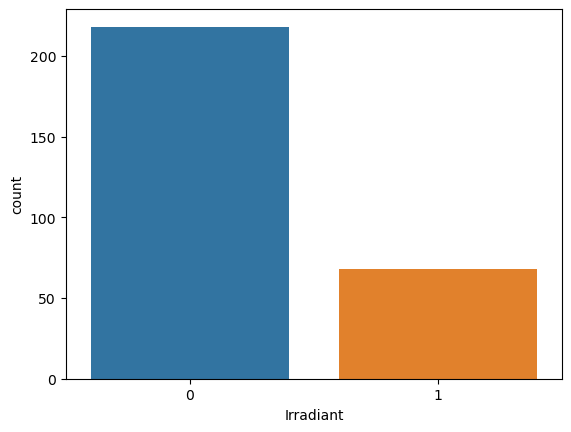

In [4]:
sns.countplot(x="Irradiant", data=all_df)

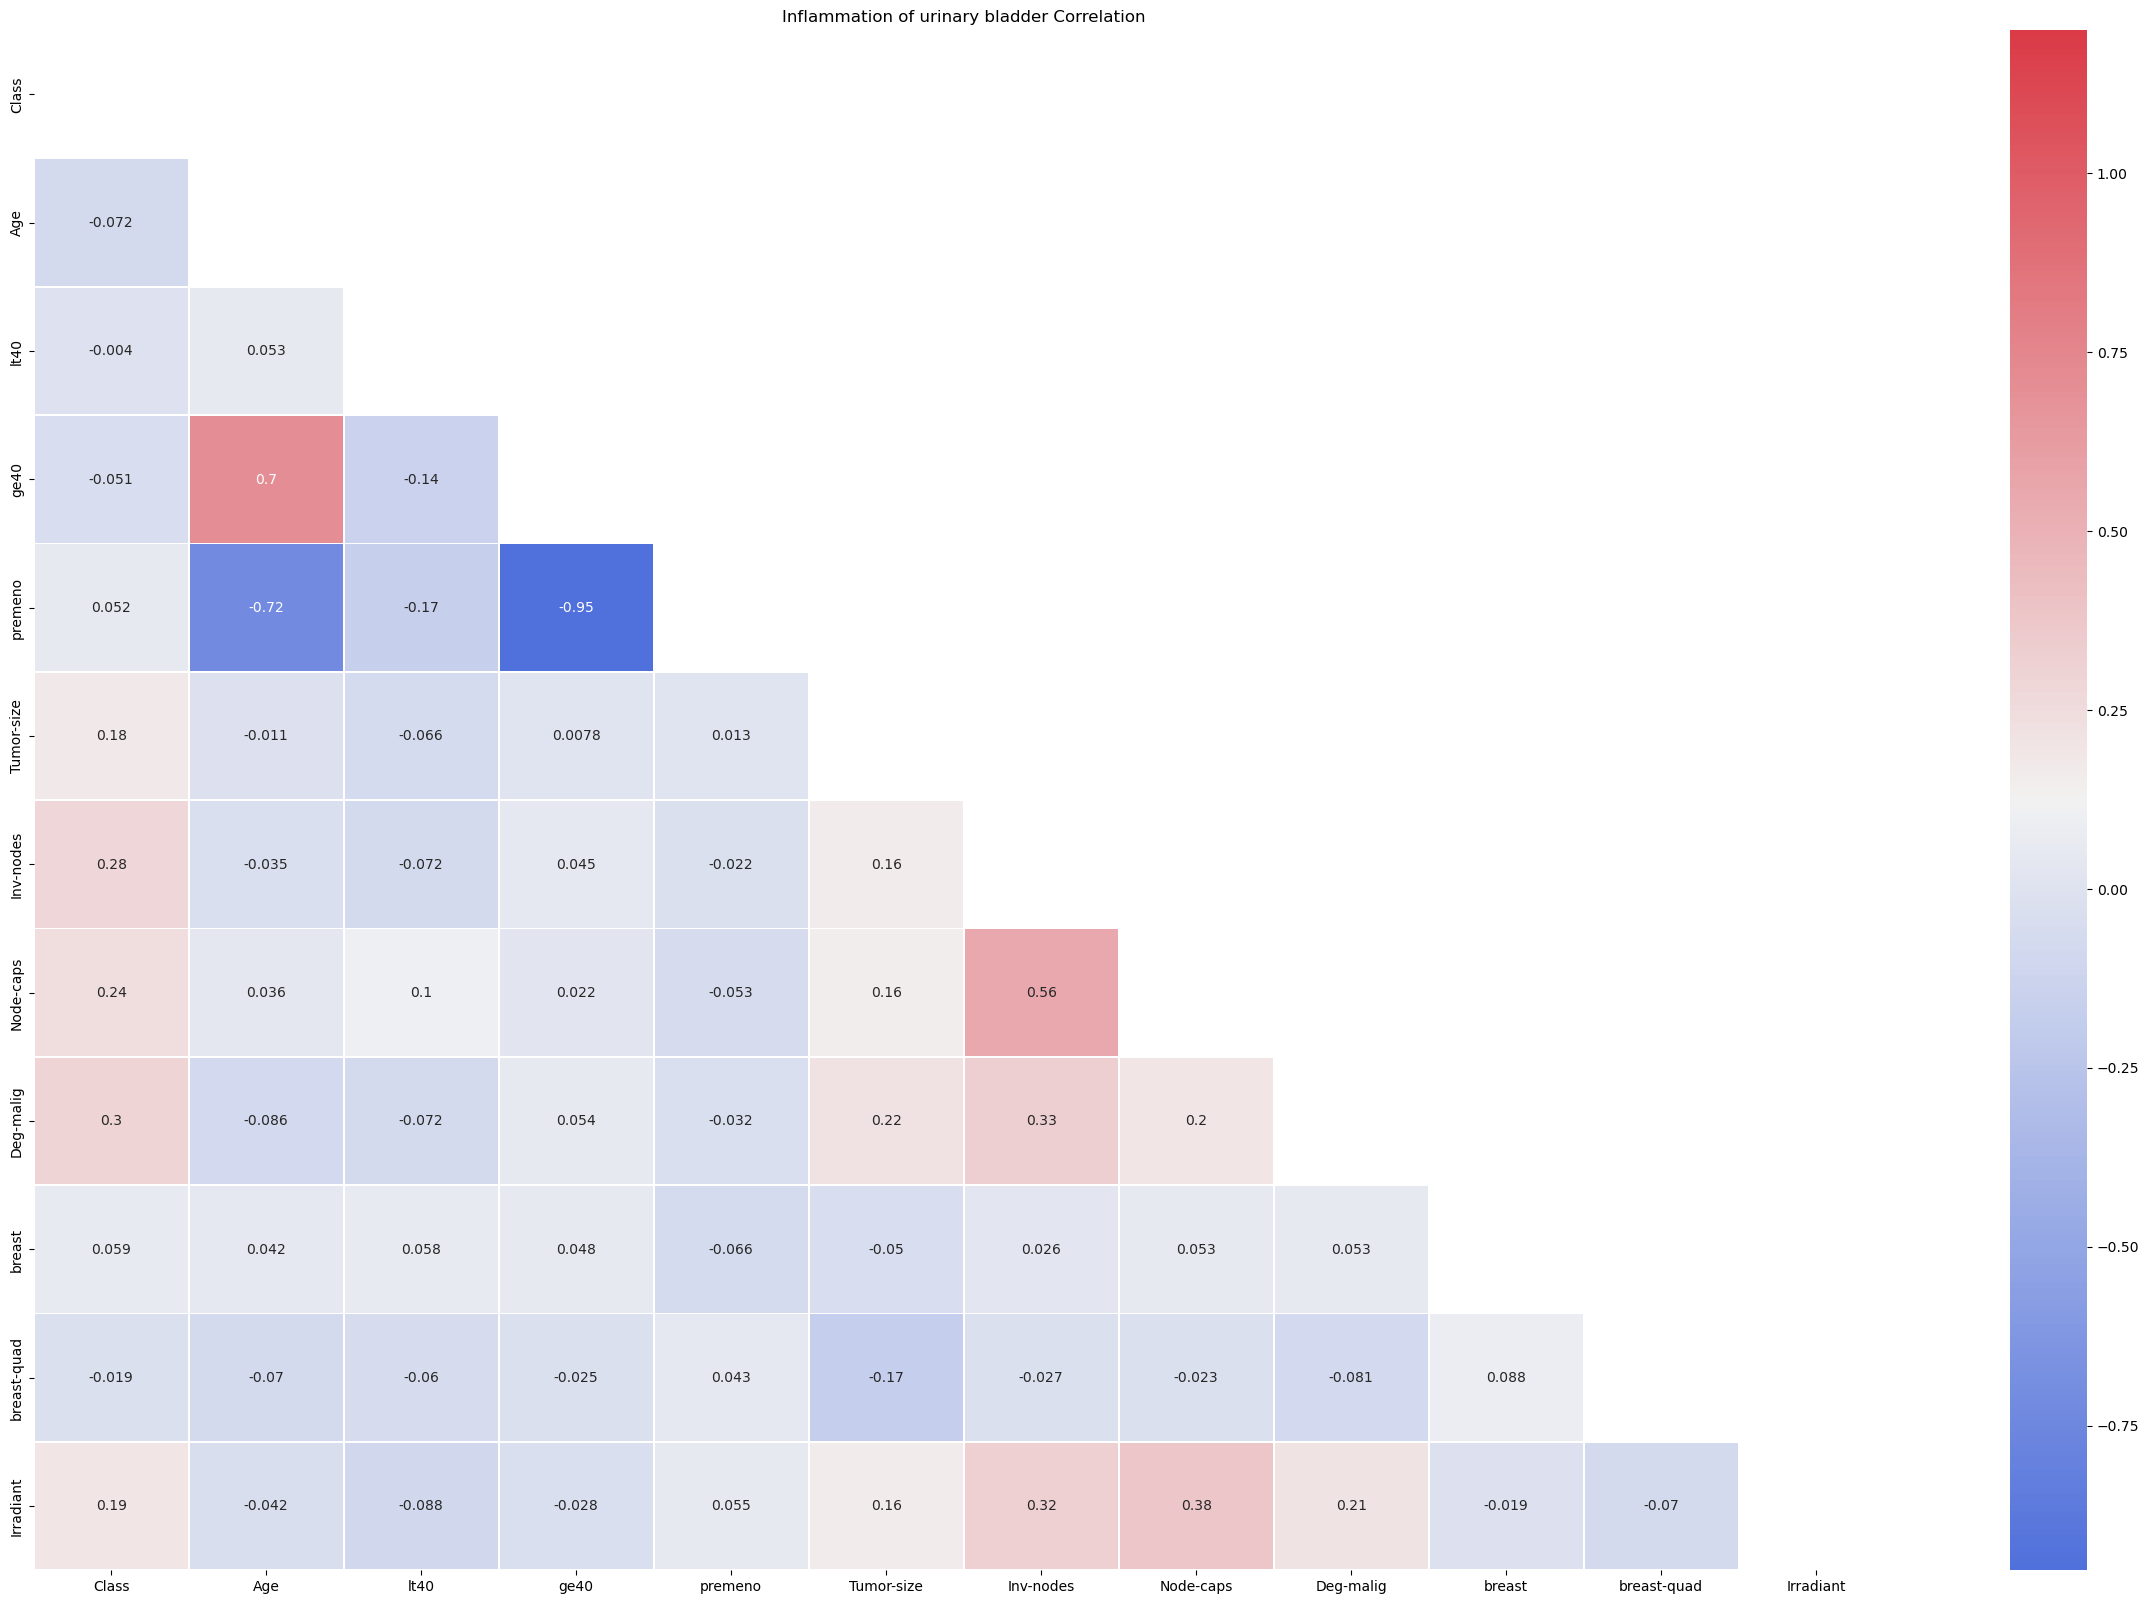

In [5]:
corrMatt = all_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(30, 20))
plt.title('Inflammation of urinary bladder Correlation')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, ax=ax, annot=True, fmt='.2g', linewidths=0.5);

In [6]:
features = features.drop('breast', axis=1)
x_train, x_test, y_train, y_test = train_test_split(features, all_df['Irradiant'], test_size=0.3, random_state=1, stratify=all_df['Irradiant'])

# Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold

clf = LogisticRegression(max_iter = 1000)
cv_error = np.average(cross_val_score(clf, features, target, scoring='accuracy'))
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(5, cv_error))

The 5-fold cross-validation accuracy score for this classifier is 0.77


# SVM

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

svm = SVC(kernel="rbf", gamma='auto')

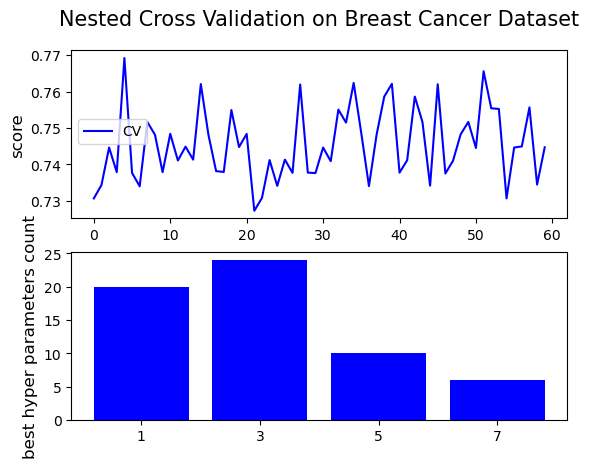

In [9]:
NUM_TRIALS = 60
X = features
y = target

# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 3, 5, 7]}

scores = np.zeros(NUM_TRIALS)
params = []

for i in range(NUM_TRIALS):

    cv = KFold(n_splits=5, shuffle=True, random_state=i)

    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=cv)
    clf.fit(X,y)
    scores[i] = clf.best_score_
    params.append(clf.best_params_)


best_hyper_params_count = np.zeros(4)
for i in params:
    if params.count(i) >= 1:
        best_hyper_params_count[int((i["C"]-1)/2)] = params.count(i)

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
(line,) = plt.plot(scores, color="b")
plt.ylabel("score", fontsize="12")
plt.legend(
    [line],
    ["CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Nested Cross Validation on Breast Cancer Dataset",
    x=0.5,
    y=1.1,
    fontsize="15",
)

plt.subplot(212)

plt.bar(range(len(best_hyper_params_count)), best_hyper_params_count,fc='b', tick_label=[1,3,5,7])
plt.ylabel("best hyper parameters count", fontsize="12")
plt.show()

In [10]:
svm = SVC(C=3.0, kernel="rbf", gamma='auto', degree=3)
cv_error_array = cross_val_score(svm, features, target, scoring='accuracy')
average = np.average(cv_error_array)
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(5, average))

The 5-fold cross-validation accuracy score for this classifier is 0.73


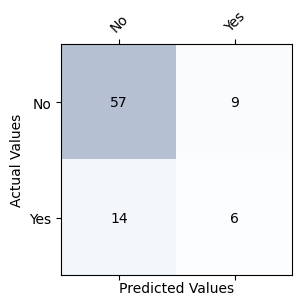

In [11]:
svm = SVC(C=3.0, kernel="rbf", gamma='auto', degree=3)
pred = svm.fit(x_train,y_train).predict(x_test)
cm = confusion_matrix(y_test, pred)
# Plot confusion matrix,
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
         ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
classes=["No","Yes"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values');

In [12]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier()

In [13]:
NUM_TRIALS = 150
X = features
y = target

# Set up possible values of parameters to optimize over
p_grid = {'max_depth': [3, 5, 7, 9, 11], 'min_samples_split':[5, 10, 15]}

scores = np.zeros(NUM_TRIALS)
params = []

for i in range(NUM_TRIALS):

    cv = KFold(n_splits=5, shuffle=True, random_state=i)

    clf = GridSearchCV(estimator=tree_clf, param_grid=p_grid, cv=cv)
    clf.fit(X,y)
    scores[i] = clf.best_score_
    params.append(clf.best_params_)

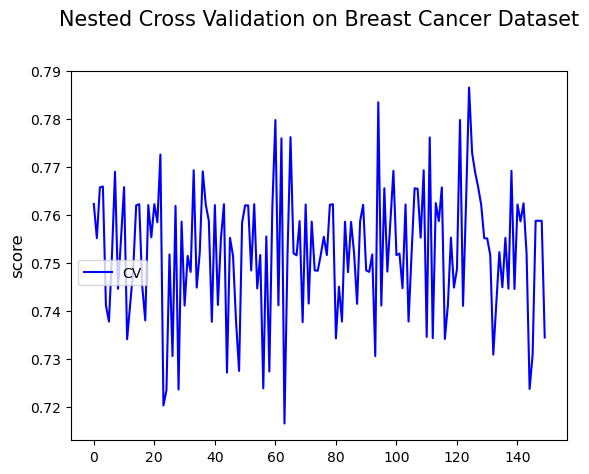

In [14]:
best_hyper_params_count = [[0 for i in range(5)] for j in range(3)]
for i in params:
    best_hyper_params_count[int(i['min_samples_split']/5-1)][int((i['max_depth']-3)/2)] = params.count(i)

# Plot scores on each trial for nested and non-nested CV
plt.figure()
(line,) = plt.plot(scores, color="b")
plt.ylabel("score", fontsize="12")
plt.legend(
    [line],
    ["CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Nested Cross Validation on Breast Cancer Dataset",
    x=0.5,
    y=1.1,
    fontsize="15",
)

plt.show()


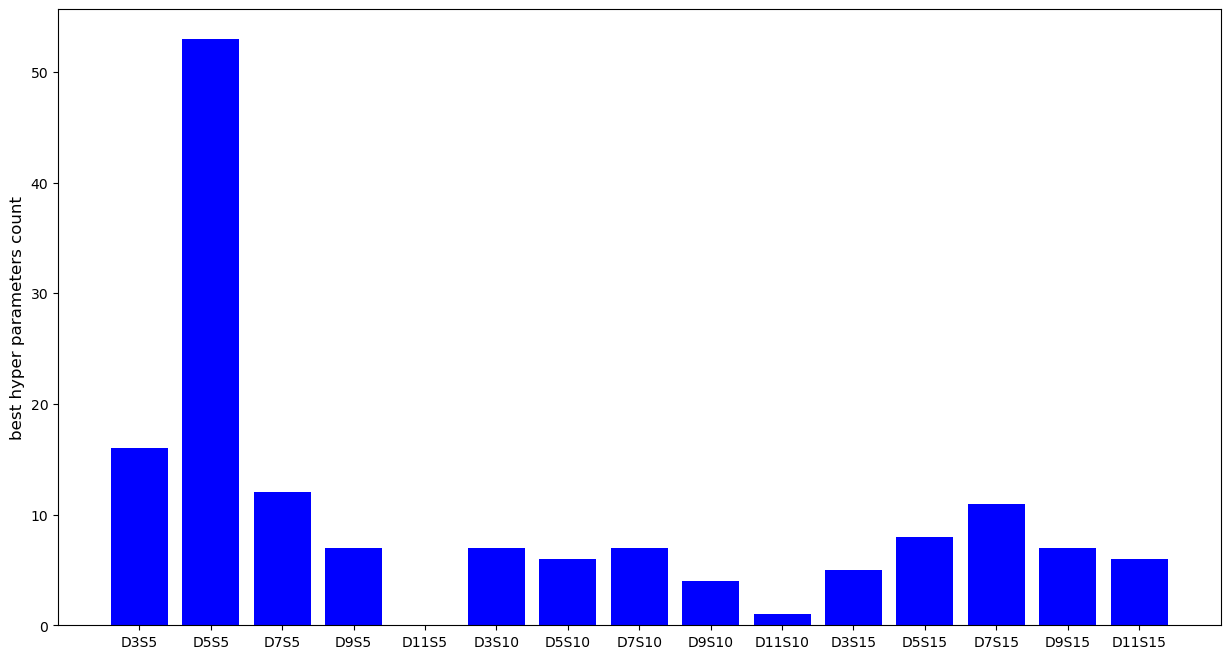

In [15]:
plt.figure(figsize = (15,8))

whole_list = best_hyper_params_count[0] + best_hyper_params_count[1] + best_hyper_params_count[2]

lang = []

for j in range(5,20,5):
    for i in range(3,13,2):
        lang.append('D' + str(i) + 'S' + str(j))       

plt.bar(range(len(whole_list)), whole_list, fc='b', tick_label=lang)

plt.ylabel("best hyper parameters count", fontsize="12")

plt.show()

From the cross validation above, we can see that __max_depth = 5__ and __min_samples_split = 5__ give the best result.

In [16]:
tree_clf = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 5)

cv_error = np.average(cross_val_score(tree_clf, features, target))

print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(5, cv_error))

The 5-fold cross-validation accuracy score for this classifier is 0.74


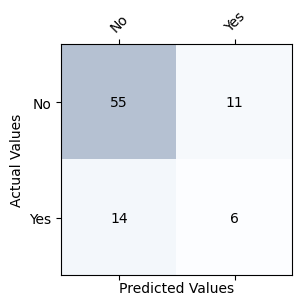

In [17]:
pred = tree_clf.fit(x_train,y_train).predict(x_test)
cm = confusion_matrix(y_test, pred)
# Plot confusion matrix,
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
         ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
classes=["No","Yes"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values');

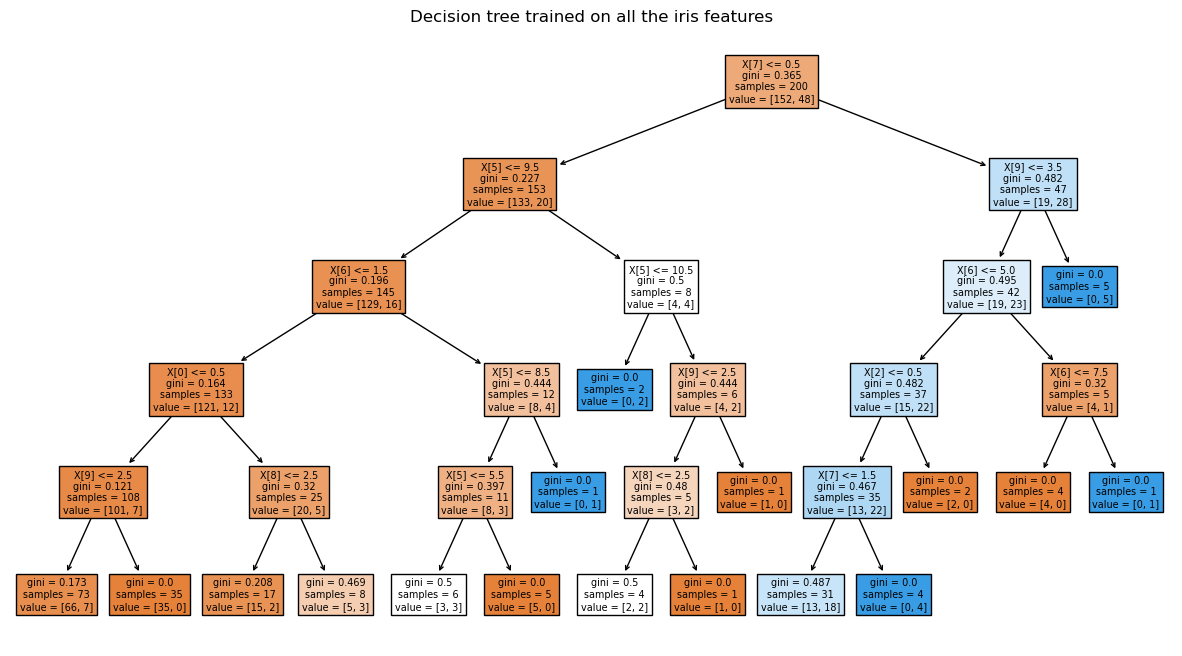

In [18]:
from sklearn.tree import plot_tree

plt.figure(figsize = (15,8))
plot_tree(tree_clf.fit(x_train,y_train), filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

## ANN

In [59]:
! pip install -q -U keras-tuner
from tensorflow.keras.models import Sequential
import keras_tuner as kt

x_train, x_test, y_train, y_test = train_test_split(features, all_df['Irradiant'], test_size=0.3, random_state=1, stratify=all_df['Irradiant'])

def model_builder(hp):
    model = tf.keras.models.Sequential()

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=16, max_value=64, step=16)
    model.add(keras.layers.Dense(input_dim=10, units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=hp_learning_rate),
                loss=tf.keras.losses.binary_crossentropy,
                metrics=['accuracy'])

    return model

tuner = kt.RandomSearch(model_builder,
                     objective='val_accuracy',
                     max_trials=5,  
                     executions_per_trial=3,
                     directory='my_dir')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(features, target, epochs=50, validation_split=0.2)

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

# model_one_layer=keras.models.Sequential()
# model_one_layer.add(keras.layers.Dense(32, input_dim=10,activation="relu"))
# model_one_layer.add(keras.layers.Dense(1, activation='sigmoid'))
# model_one_layer.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model_two_layer=keras.models.Sequential()
model_two_layer.add(keras.layers.Dense(32, input_dim=10,activation="relu"))
model_two_layer.add(keras.layers.Dense(16 ,activation="relu"))
model_two_layer.add(keras.layers.Dense(1, activation='sigmoid'))
model_two_layer.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

INFO:tensorflow:Reloading Oracle from existing project my_dir\untitled_project\oracle.json

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
48                |?                 |units
0.001             |?                 |learning_rate
2                 |?                 |tuner/epochs
0                 |?                 |tuner/initial_epoch
2                 |?                 |tuner/bracket
0                 |?                 |tuner/round

Train on 228 samples, validate on 58 samples
Epoch 1/50
 32/228 [===>..........................] - ETA: 0s - loss: 1.1578 - acc: 0.1875

AttributeError: 'Sequential' object has no attribute 'distribute_strategy'

In [34]:
from sklearn.model_selection import KFold
import os

# root file for logging the learning process and can be visualised later in
# tensorboard
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
     import time
     run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
     return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
kf = KFold(n_splits=5)
k=1

for train_index, test_index in kf.split(features):
    print("fold",k)
    # Split the data
    X_train, X_test = np.array(features)[train_index], np.array(features)[test_index]
    y_train, y_test = np.array(target)[train_index], np.array(target)[test_index]
    # tensorboard for visualising the training process later
    tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
    # training and validation
    model_one_layer.fit(np.array(X_train), np.array(y_train), epochs=10, validation_data=(np.array(X_test), np.array(y_test)),callbacks=[tensorboard_cb])

    #save the model of each fold
    model_one_layer.save(os.path.join('fold_{}_model_one_layer.hdf5'.format(k)))
    
    model_two_layer.fit(np.array(X_train), np.array(y_train), epochs=10, validation_data=(np.array(X_test), np.array(y_test)),callbacks=[tensorboard_cb])

    #save the model of each fold
    model_two_layer.save(os.path.join('fold_{}_model_two_layer.hdf5'.format(k)))
    
    # evaluate the accuracy of each fold
    scores_one_layer = model_one_layer.evaluate(np.array(X_test), np.array(y_test), verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores_one_layer[1]*100))
    
    scores_two_layer = model_two_layer.evaluate(np.array(X_test), np.array(y_test), verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores_two_layer[1]*100))
    k=k+1


fold 1
Train on 228 samples, validate on 58 samples
Epoch 1/10
228/228 [==============================] - 0s 263us/sample - loss: 0.5178 - acc: 0.7763 - val_loss: 0.4240 - val_acc: 0.8621
Epoch 2/10
228/228 [==============================] - 0s 170us/sample - loss: 0.5082 - acc: 0.7632 - val_loss: 0.4238 - val_acc: 0.8621
Epoch 3/10
228/228 [==============================] - 0s 161us/sample - loss: 0.5064 - acc: 0.7588 - val_loss: 0.4477 - val_acc: 0.8103
Epoch 4/10
228/228 [==============================] - 0s 175us/sample - loss: 0.5093 - acc: 0.7588 - val_loss: 0.4356 - val_acc: 0.8448
Epoch 5/10
228/228 [==============================] - 0s 175us/sample - loss: 0.5072 - acc: 0.7588 - val_loss: 0.4288 - val_acc: 0.8621
Epoch 6/10
228/228 [==============================] - 0s 211us/sample - loss: 0.5068 - acc: 0.7588 - val_loss: 0.4312 - val_acc: 0.8621
Epoch 7/10
228/228 [==============================] - 0s 175us/sample - loss: 0.5031 - acc: 0.7632 - val_loss: 0.4532 - val_acc: 0.8

Epoch 9/10
229/229 [==============================] - 0s 175us/sample - loss: 0.4528 - acc: 0.8079 - val_loss: 0.4917 - val_acc: 0.7719
Epoch 10/10
229/229 [==============================] - 0s 174us/sample - loss: 0.4586 - acc: 0.8122 - val_loss: 0.4951 - val_acc: 0.7719
acc: 77.19%
acc: 77.19%
fold 4
Train on 229 samples, validate on 57 samples
Epoch 1/10
229/229 [==============================] - 0s 210us/sample - loss: 0.4809 - acc: 0.7904 - val_loss: 0.5340 - val_acc: 0.7018
Epoch 2/10
229/229 [==============================] - 0s 175us/sample - loss: 0.4859 - acc: 0.8166 - val_loss: 0.5067 - val_acc: 0.7544
Epoch 3/10
229/229 [==============================] - 0s 175us/sample - loss: 0.4777 - acc: 0.7948 - val_loss: 0.5269 - val_acc: 0.7193
Epoch 4/10
229/229 [==============================] - 0s 140us/sample - loss: 0.4828 - acc: 0.8079 - val_loss: 0.5273 - val_acc: 0.7018
Epoch 5/10
229/229 [==============================] - 0s 175us/sample - loss: 0.4807 - acc: 0.8079 - val_lo

In [33]:
x_train, x_test, y_train, y_test = train_test_split(features, all_df['Irradiant'], test_size=0.3, random_state=1, stratify=all_df['Irradiant'])

model_one_layer.load_weights('fold_3_model_one_layer.hdf5')

y_pred=model_one_layer.predict(np.array(x_test))

loss, acc = model_one_layer.evaluate(np.array(x_test), np.array(y_test), verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

86/86 - 0s - loss: 0.5034 - acc: 0.8023
Restored model, accuracy: 80.23%
